## Resume Classification
### Business objective:
* **The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention**

In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## 1. Import Library

In [2]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

C:\Users\Priyanshu Chauhan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2. About Dataset

In [3]:
file_path   = r"D:\project\Resumes project/"
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            doc_file.append(file)
            folder_name.append(folder)
        elif file.endswith('.docx'):
            docx_file.append(file)
            folder_name.append(folder)
        else:
            pdf_file.append(file)
            folder_name.append(folder)

In [4]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 79


In [5]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  106


### 2.1 Type of File Format

In [6]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

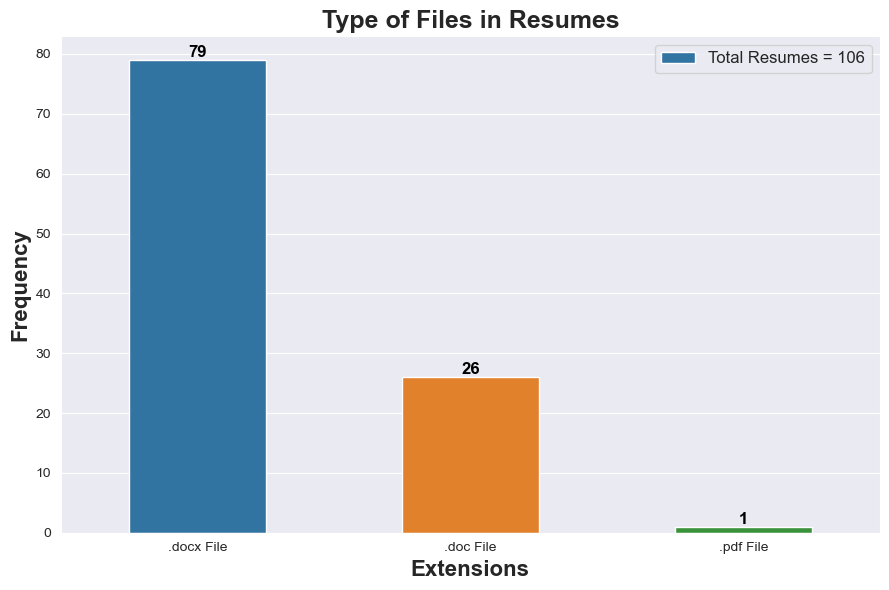

In [7]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

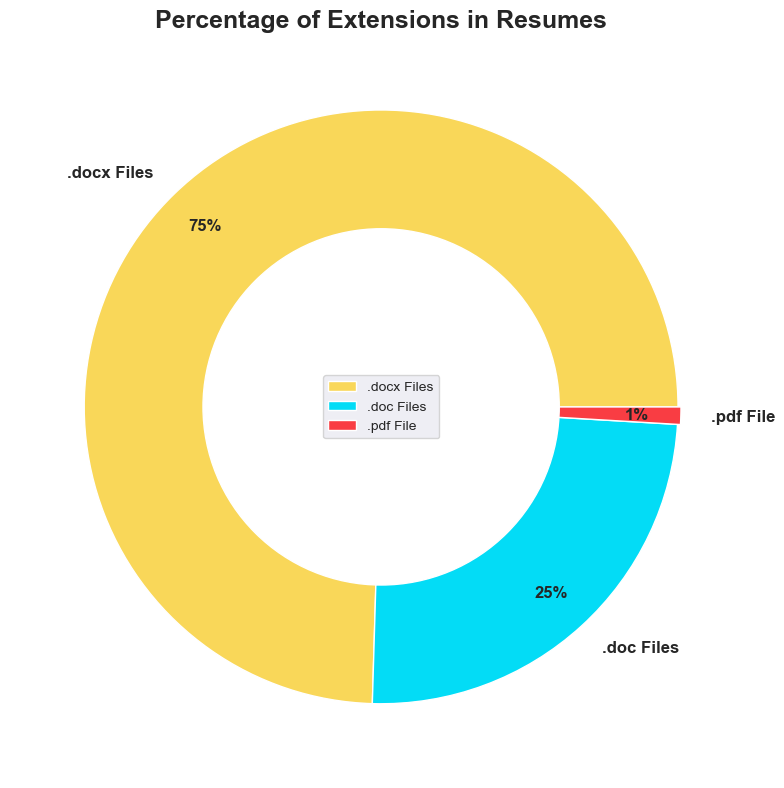

In [8]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## 3. Extract Resumes by Profile Category

In [13]:
file_path = r"D:\project\Resumes project/"
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)

In [14]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.docx
3,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
4,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.docx
...,...,...
101,workday resumes,Srikanth-Hexaware.docx
102,workday resumes,SSKumar_Hexaware.docx
103,workday resumes,Venkateswarlu B_Hexaware.doc
104,workday resumes,Venkateswarlu B_Hexaware.docx


In [15]:
resume_data.Profile.value_counts().index

Index(['workday resumes', 'Peoplesoft resumes', 'React JS dev',
       'SQL Developer Lightning insight'],
      dtype='object', name='Profile')

In [16]:
resume_data.Profile.value_counts()

Profile
workday resumes                    31
Peoplesoft resumes                 30
React JS dev                       28
SQL Developer Lightning insight    17
Name: count, dtype: int64

### 3.1 Number of Total Resumes

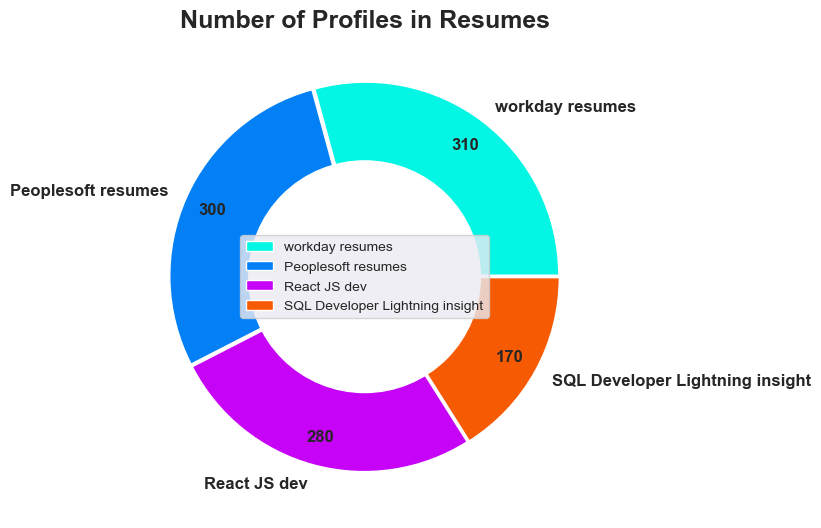

In [17]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/10),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

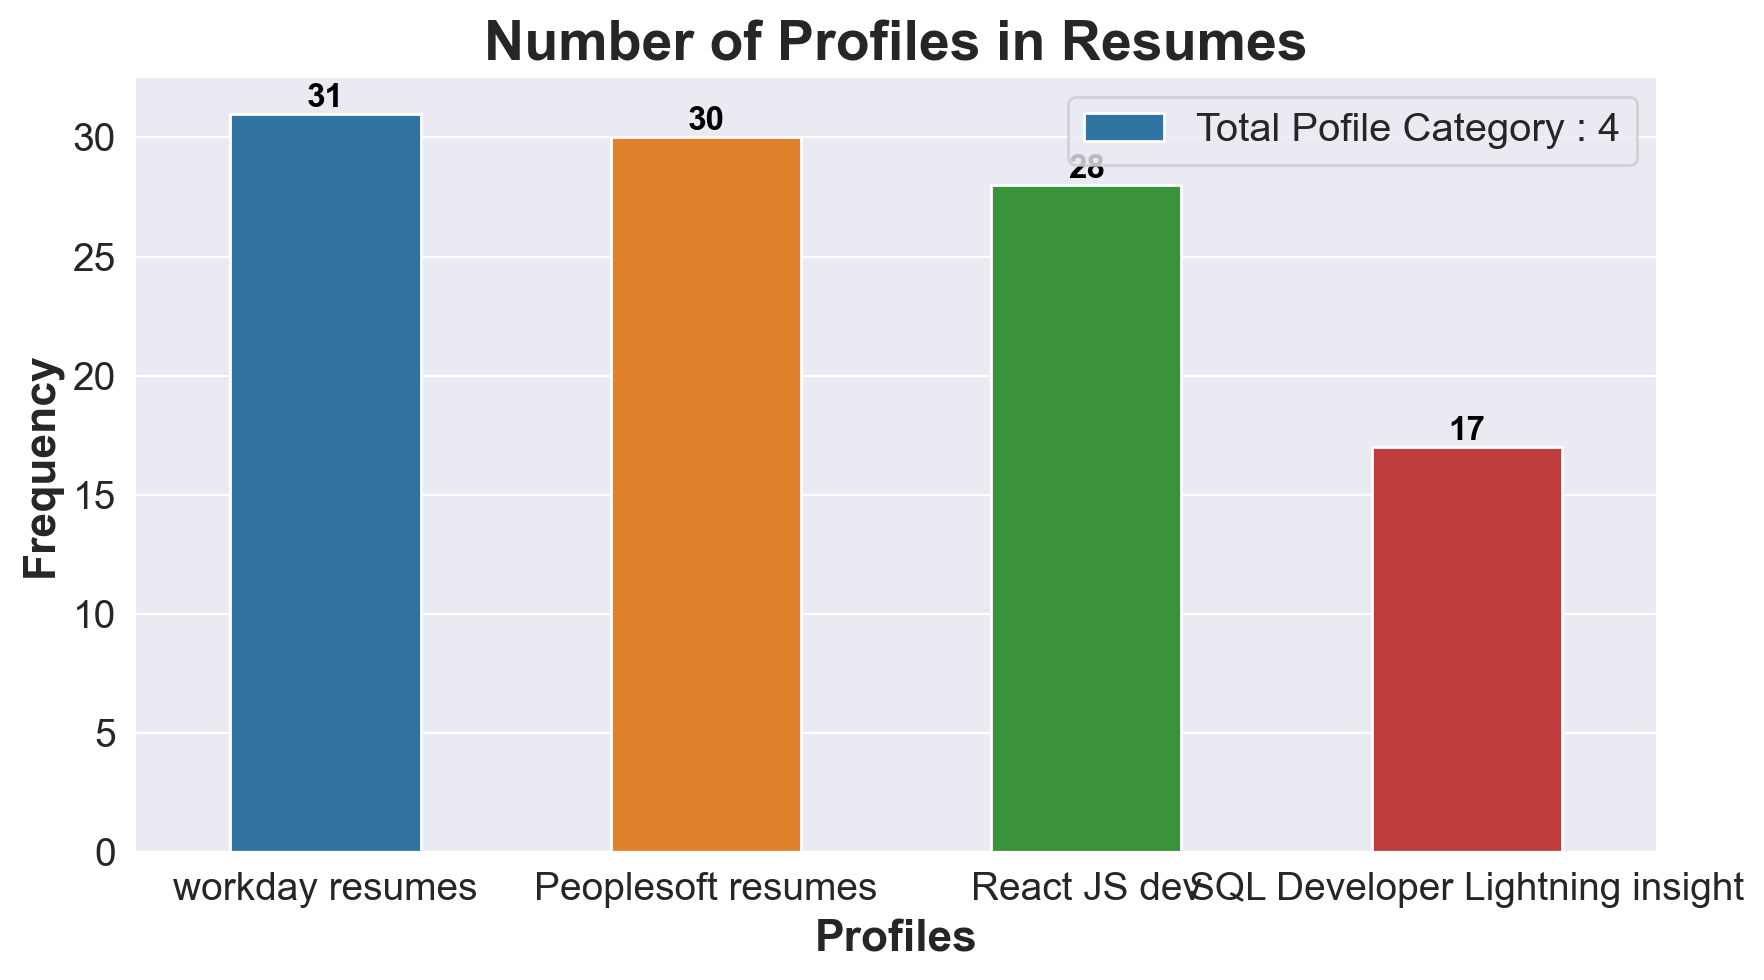

In [18]:
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)
ax = sns.barplot(x= resume_data.Profile.value_counts().index, y= resume_data.Profile.value_counts(), width=0.5,
                 data= resume_data, ax= axe, label= 'Total Pofile Category : {}'.format(len(resume_data.Profile.unique())))

axe.set_xlabel('Profiles', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Number of Profiles in Resumes', fontsize= 20, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Percentage of Profiles Category

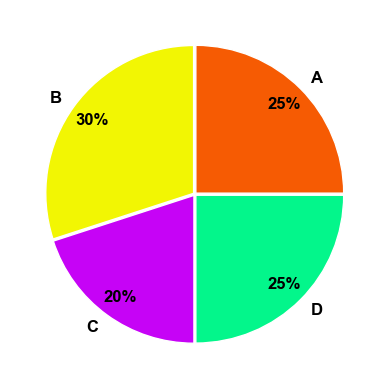

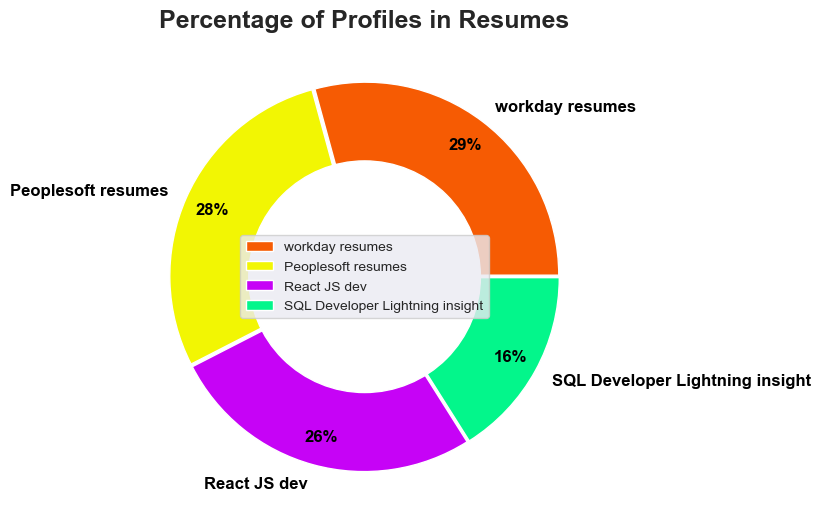

In [19]:
import matplotlib.pyplot as plt

sizes = [25, 30, 20, 25]  # example data
labels = ['A', 'B', 'C', 'D']
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

if len(sizes) != len(explode):
    # raise a ValueError if the lengths are not equal
    raise ValueError("'explode' must be of length 'sizes'")

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.85, explode=explode,
        startangle=0, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})



fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

## 4. Reading a Resume File

In [20]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None
 
print(extract_text_from_docx("D:\project\Resumes project\React JS dev\React Developer_Haripriya.docx"))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

## 5. Data Exploration

In [21]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,ananda rayudu ananda rayudu profile summary ye...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant professional ...


### 5.1 N-grams
* **N-grams analyses are often used to see which words often show up together.**

In [22]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials'])]

In [23]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'ananda']),
 WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus'])]

In [24]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'ananda']),
 WordList(['rayudu', 'ananda', 'rayudu']),
 WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions'])]

In [25]:
resume_data['Resume_Details']

0     anubhav kumar singh core competencies scriptin...
1     ananda rayudu ananda rayudu profile summary ye...
2     peoplesoft database administrator gangareddy p...
3     classification internal classification interna...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    workday integration consultant name sri krishn...
75    srikanth workday hcm consultant seeking suitab...
76    workday hcm fcm name kumar role workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 79, dtype: object

### 5.2 Top 20 most used words in Resumes
* **Using CountVectorizer**

In [26]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [27]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,600,experience
1,453,peoplesoft
2,432,workday
3,418,application
4,395,using
5,360,server
6,332,data
7,327,project
8,326,reports
9,281,sql


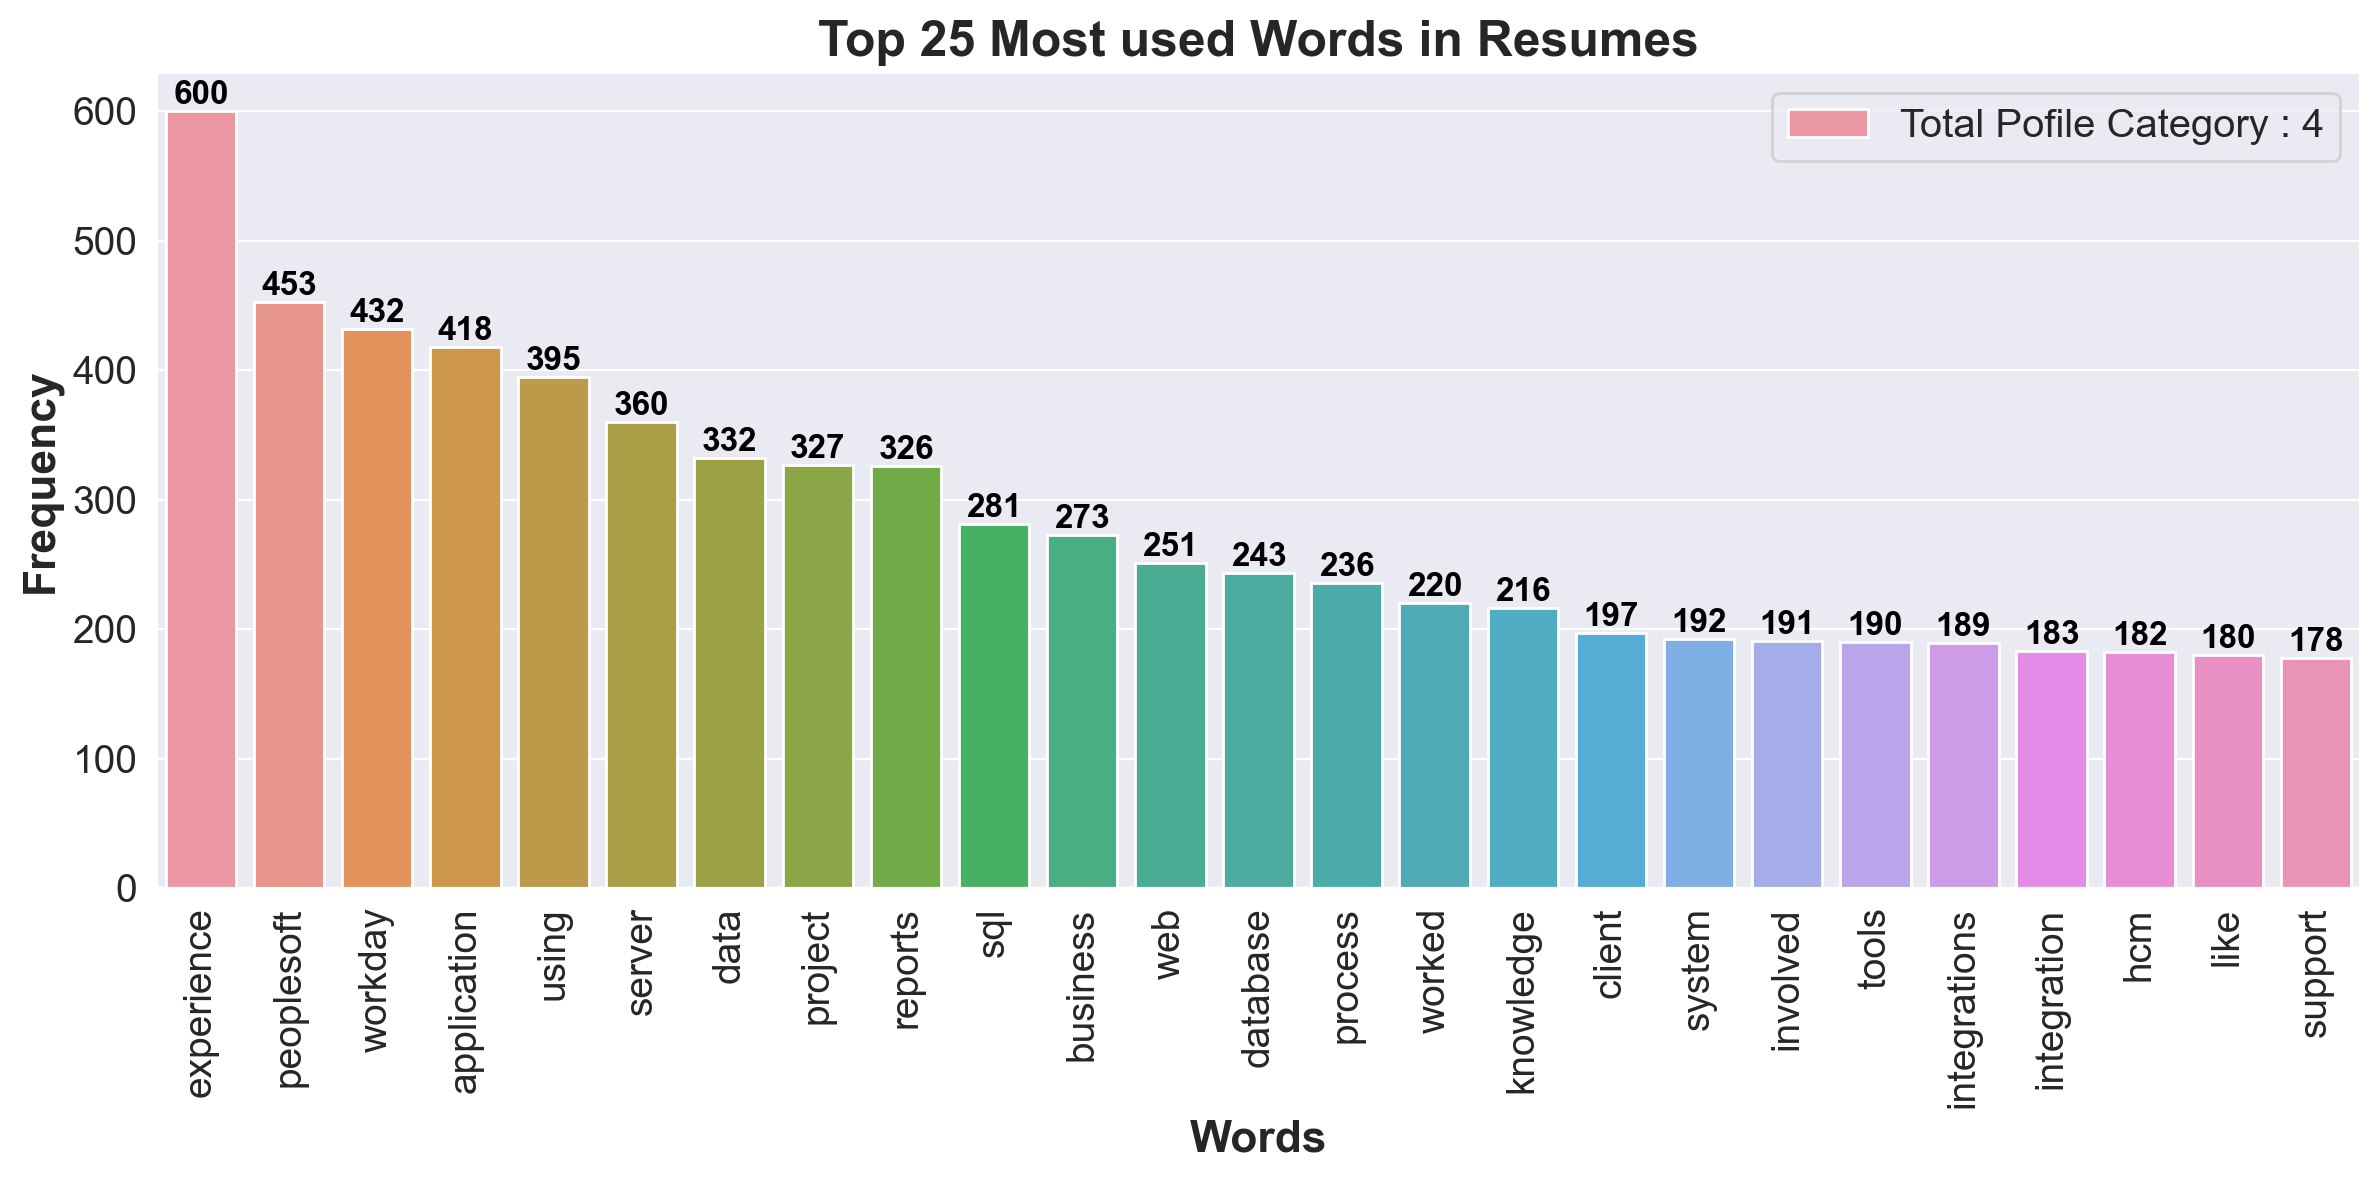

In [28]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### 5.4 Using the Word Clowds

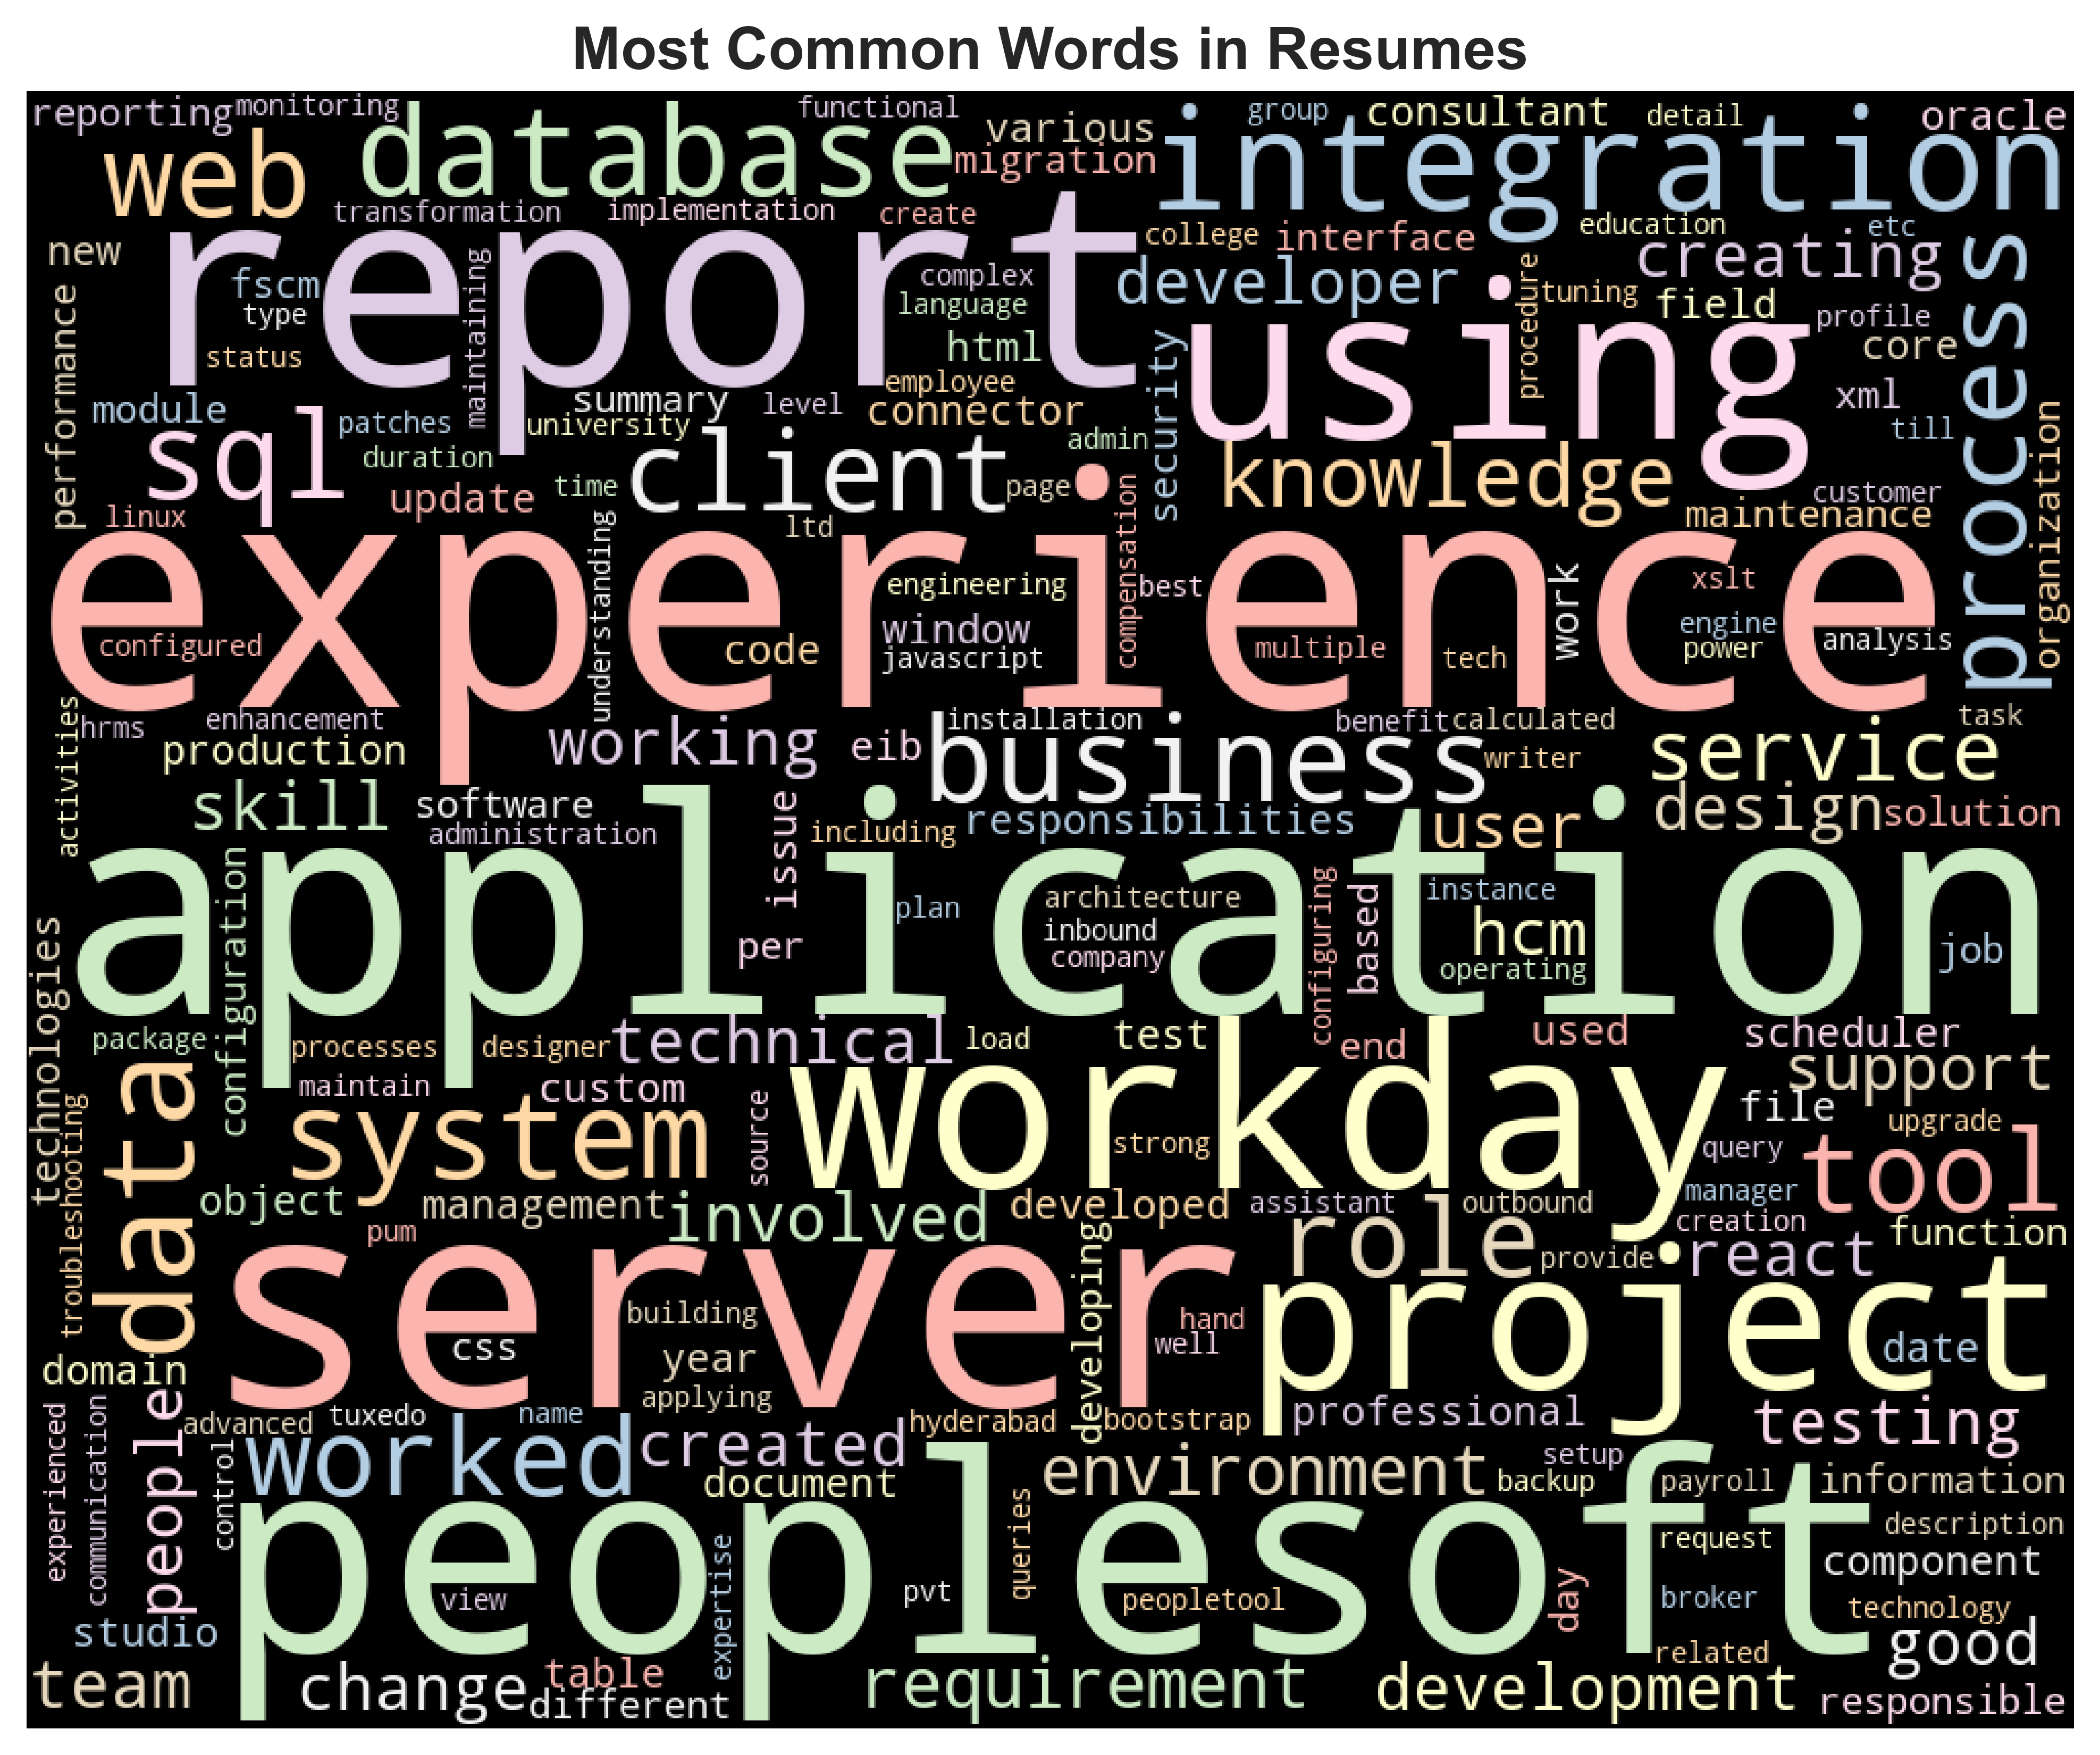

In [29]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

#word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()

# THE END !!